In [2]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

In [17]:
#loading the data

In [20]:
df= pd.read_csv('data.csv')
df


,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [21]:
#fbprophet model only understand columns with name ds and y so rename accordingly

In [22]:
df.rename(columns = {'Month':'ds', '#Passengers':"y"}, inplace = True)
df

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [23]:
#checking for the datatype of each column

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      144 non-null    object
 1   y       144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [25]:
df["ds"] = pd.to_datetime(df["ds"])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [27]:
#fitting fbprophet model

In [28]:

model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\anaconda3\envs\py\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [29]:
#makeing prediction for 5 years

In [31]:
future = model.make_future_dataframe(periods=12 * 5, freq='M')

In [ ]:
# forecasting the data 

In [34]:
forecast = model.predict(future)

D:\anaconda3\envs\py\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
D:\anaconda3\envs\py\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [35]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.043316,57.796296,114.024332,107.043316,107.043316,-21.463322,-21.463322,-21.463322,-21.463322,-21.463322,-21.463322,0.0,0.0,0.0,85.579994
1,1949-02-01,109.198139,50.795283,106.090799,109.198139,109.198139,-30.136520,-30.136520,-30.136520,-30.136520,-30.136520,-30.136520,0.0,0.0,0.0,79.061619
2,1949-03-01,111.144431,83.554712,138.858982,111.144431,111.144431,-0.460032,-0.460032,-0.460032,-0.460032,-0.460032,-0.460032,0.0,0.0,0.0,110.684399
3,1949-04-01,113.299254,80.687456,135.801583,113.299254,113.299254,-4.934765,-4.934765,-4.934765,-4.934765,-4.934765,-4.934765,0.0,0.0,0.0,108.364489
4,1949-05-01,115.384567,81.144395,140.905840,115.384567,115.384567,-3.612284,-3.612284,-3.612284,-3.612284,-3.612284,-3.612284,0.0,0.0,0.0,111.772282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1965-07-31,656.437586,693.119251,751.963441,649.232952,662.749145,66.907804,66.907804,66.907804,66.907804,66.907804,66.907804,0.0,0.0,0.0,723.345391
200,1965-08-31,659.563444,648.091909,704.793978,652.149521,666.093061,17.843679,17.843679,17.843679,17.843679,17.843679,17.843679,0.0,0.0,0.0,677.407123
201,1965-09-30,662.588468,610.176026,668.255748,654.914932,669.273654,-22.348365,-22.348365,-22.348365,-22.348365,-22.348365,-22.348365,0.0,0.0,0.0,640.240104
202,1965-10-31,665.714326,580.758287,639.466322,657.886130,672.524882,-55.269971,-55.269971,-55.269971,-55.269971,-55.269971,-55.269971,0.0,0.0,0.0,610.444355


In [36]:
# plotting the forecasted data

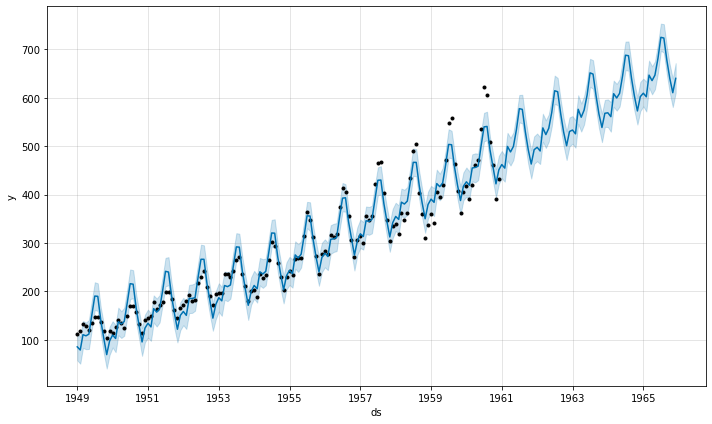

In [38]:
fig1 = model.plot(forecast)

D:\anaconda3\envs\py\lib\site-packages\fbprophet\forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


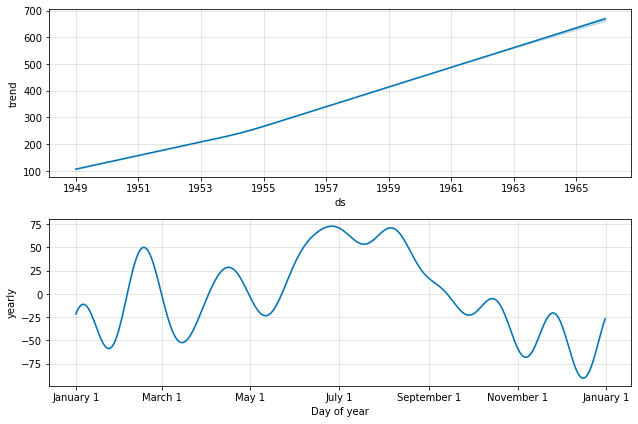

In [40]:
fig2 = model.plot_components(forecast)

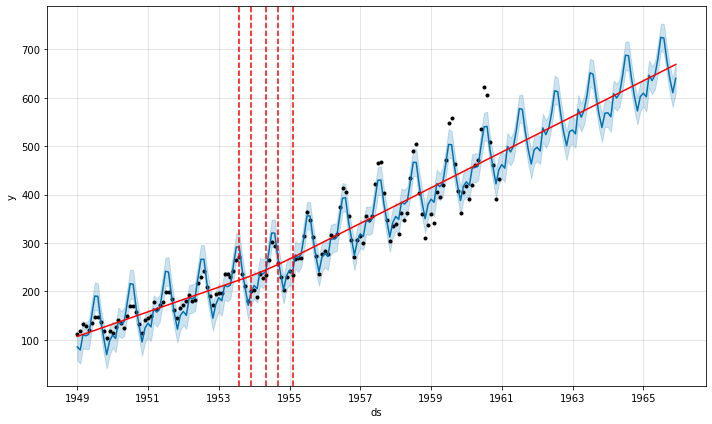

In [42]:
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)